In [1]:
import paths
import numpy as np
import h5py
from sdfs.geom_mrst import geom_plot, GeomMRST

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
plt.rc('text', usetex=True)
plt.rc('image', cmap='coolwarm')

In [5]:
geom_filename = '../data/geom_1x.mat'
geom = GeomMRST(geom_filename)

In [66]:
with h5py.File('../data/hanford_ens_data_uncond.h5','r') as f:
    xi_ens   = f['xi_ens'][:]
    ytms_ens = f['ytms_ens'][:]
    u_ens    = f['u_ens'][:]
    yref     = f['yref'][:]
    ypred    = f['ypred'][:]
    Psi_y    = f['Psi_y'][:]
    ytm      = f['ytm'][()]
    Nens     = f['Nens'][()]
    Nxi      = f['Nxi'][()]

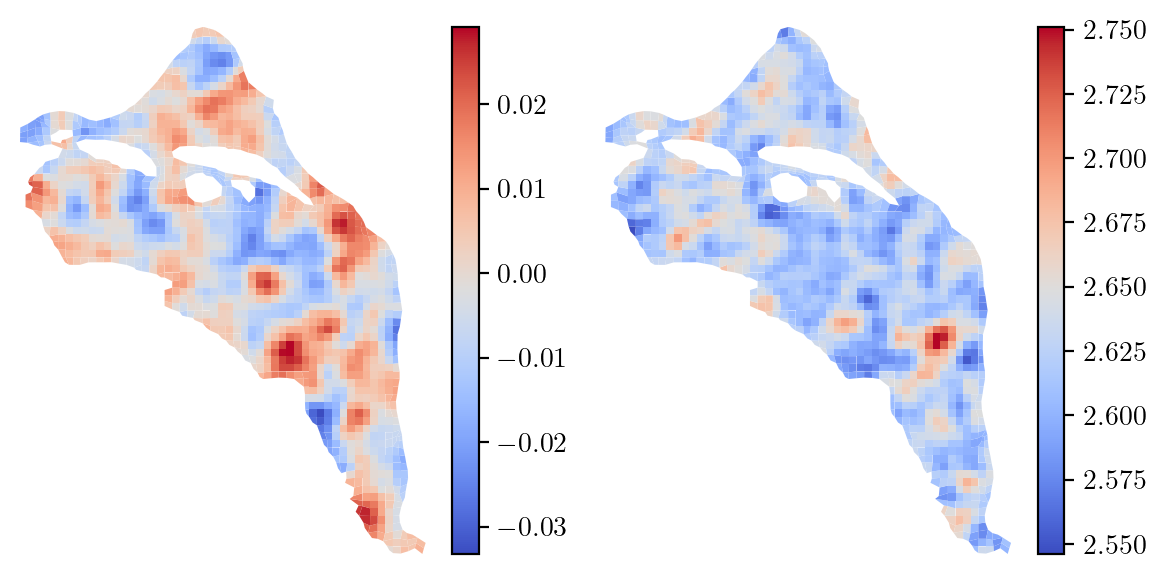

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
# Mean
plot = geom_plot(geom, np.mean(ytms_ens, axis=0) - ypred, ax[0])
ax[0].set_aspect('equal')
ax[0].axis('off')
ax[0].autoscale(tight=True)
fig.colorbar(plot, ax=ax[0])
fig.tight_layout()
# Var
plot = geom_plot(geom, np.var(ytms_ens, axis=0, ddof=1), ax[1])
ax[1].set_aspect('equal')
ax[1].axis('off')
ax[1].autoscale(tight=True)
fig.colorbar(plot, ax=ax[1])
fig.tight_layout()

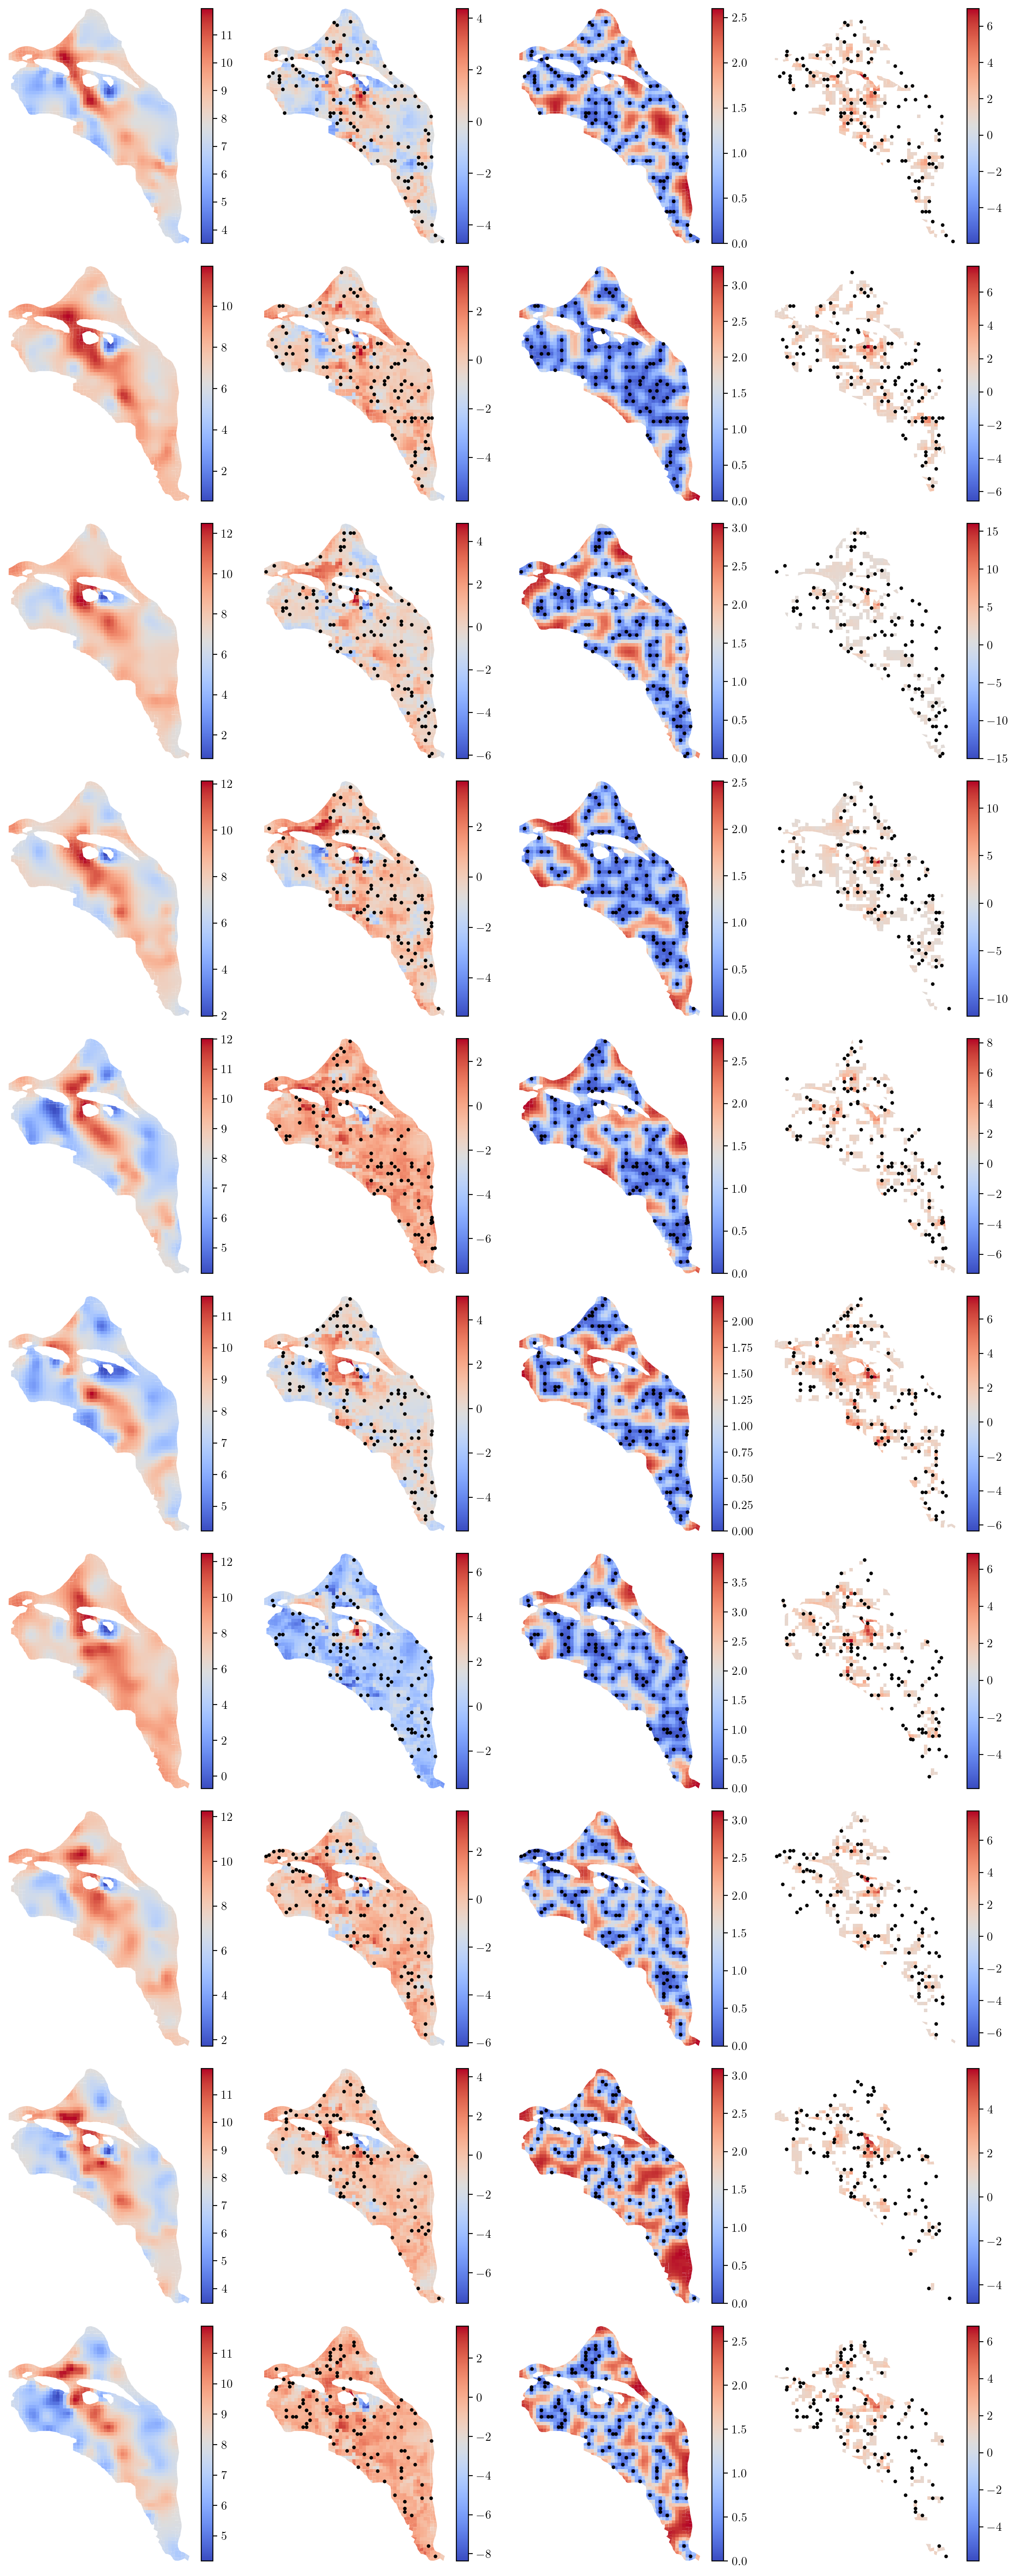

In [69]:
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(12, 30))
for i in range(10):
    with h5py.File('../data/hanford_ens_data_cond.h5','r') as f:
        ytms_ens = f[f't{i:d}']['ytms_ens'][:]
        iyobs    = f[f't{i:d}']['iyobs'][:]
    # Mean
    plot = geom_plot(geom, ytm + np.mean(ytms_ens, axis=0), ax[i, 0])
    ax[i, 0].set_aspect('equal')
    ax[i, 0].axis('off')
    ax[i, 0].autoscale(tight=True)
    fig.colorbar(plot, ax=ax[i, 0])
    plot = geom_plot(geom, yref - np.mean(ytms_ens, axis=0), ax[i, 1])
    ax[i, 1].plot(geom.cells.centroids[0, iyobs[i]], geom.cells.centroids[1, iyobs[i]], 'ko', markersize=2)
    ax[i, 1].set_aspect('equal')
    ax[i, 1].axis('off')
    ax[i, 1].autoscale(tight=True)
    fig.colorbar(plot, ax=ax[i, 1])
    fig.tight_layout()
    # Var
    plot = geom_plot(geom, np.var(ytms_ens, axis=0, ddof=1), ax[i, 2])
    ax[i, 2].plot(geom.cells.centroids[0, iyobs[i]], geom.cells.centroids[1, iyobs[i]], 'ko', markersize=2)
    ax[i, 2].set_aspect('equal')
    ax[i, 2].axis('off')
    ax[i, 2].autoscale(tight=True)
    fig.colorbar(plot, ax=ax[i, 2])
    # GPR error relative to GPR std dev
    to_plot = np.abs(yref - np.mean(ytms_ens, axis=0)) / (np.std(ytms_ens, axis=0, ddof=1) + 0.01)
    to_plot[to_plot < 1] = np.NaN
    plot = geom_plot(geom, to_plot, ax[i, 3])
    ax[i, 3].plot(geom.cells.centroids[0, iyobs[i]], geom.cells.centroids[1, iyobs[i]], 'ko', markersize=2)
    ax[i, 3].set_aspect('equal')
    ax[i, 3].axis('off')
    ax[i, 3].autoscale(tight=True)
    cb = fig.colorbar(plot, ax=ax[i, 3])
    plot.set_clim(-np.nanmax(to_plot) + 1, np.nanmax(to_plot))
fig.tight_layout()